In [1]:
#import necessary libraries
import numpy as np
import math
from matplotlib import pyplot as plt
from scipy import ndimage as nd

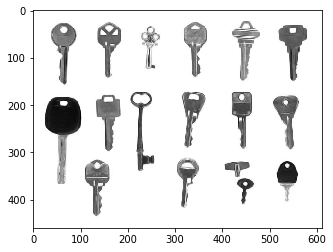

In [2]:
#display image with multiple keys
img = plt.imread("C:/Users/jack_/Downloads/multiplekeys.png")
plt.imshow(img, cmap="gray")

In [3]:
#convert image to binary
#set gray values for background and keys to a constant value
#accepts an image, the value to apply to background and value to apply to objects(keys)
#returns binary image
def binary_img(im, bg, obj):
    new_im = im.copy()
    for i in range(len(im)):
        for j in range(len(im[0])):
            if im[i][j] >= 0.9:
                new_im[i][j] = bg
            else:
                new_im[i][j] = obj
    return new_im

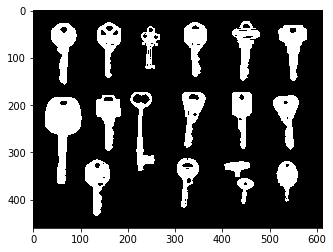

In [4]:
#display binary image
t_img = binary_img(img, 0, 1)
plt.imshow(t_img, cmap="gray")

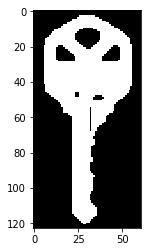

In [5]:
#crop out one of the keys to be used as the template
cropped = []
for i in range(len(t_img)):
    row = []
    for j in range(len(t_img[0])):
        if 23 <= i <= 145 and 130 <= j <= 190:
            row.append(t_img[i][j])
    if row:
        cropped.append(row)
plt.imshow(cropped, cmap="gray")

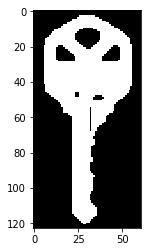

In [6]:
#set template background values to -1
signed_template = binary_img(cropped, 1, -1)
plt.imshow(signed_template, cmap="gray")

In [7]:
#modified version of finding index pairs for non-square filters and images
#requires both dimension sizes for the image and filter respectively as extra parameters
#returns index pairs at x and y separately
def findOperationIndexPairs(idx, n1, n2, s1, s2, opType):
    indexPairs = []
    side1 = int(math.floor(n1/2))
    side2 = int(math.floor(n2/2))
    ind_x = idx[0] - side1
    if opType:
        for i in range(n1):
            ind_y = idx[1] - side2
            for j in range(n2):
                tp1 = (ind_x, ind_y)
                tp2 = (i, j)
                indexPairs.append((tp1, tp2))
                ind_y += 1
            ind_x += 1
    else:
        for i in range(n1-1, -1, -1):
            ind_y = idx[1] - side2
            for j in range(n2-1, -1, -1):
                tp1 = (ind_x, ind_y)
                tp2 = (i, j)
                indexPairs.append((tp1, tp2))
                ind_y += 1
            ind_x += 1
    ixc = []
    iyc = []
    for ip in indexPairs:
        if ip[0][0] < 0 or ip[0][1] < 0 or ip[0][0] >= s1 or ip[0][1] >= s2:
            continue
        else:
            ixc.append(ip[0][0])
            iyc.append(ip[0][1])
    return ixc,iyc

In [8]:
#implementation of cross correlation
#pad imnage, extract index pairs and apply cross correlation via numpy operations
def cross_correlation(f, I):
    f_size1 = len(f)
    f_size2 = len(f[0])
    pad_size1 = int((f_size1 - 1)/2)
    pad_size2 = int((f_size2 - 1)/2)
    i_size1 = len(I)
    i_size2 = len(I[0])
    padded_arr = np.pad(I, [(pad_size1,), (pad_size2,)], mode='constant')
    # Compute im_conv = f*I
    im_cross = []
    im_size1 = len(padded_arr)
    im_size2 = len(padded_arr[0])
    for i in range(pad_size1, (i_size1 + pad_size1)):
        row = []
        for j in range(pad_size2, (i_size2 + pad_size2)):
            indices = findOperationIndexPairs((i, j), f_size1, f_size2, im_size1, im_size2, True)
            arr1 = padded_arr[min(indices[0]):max(indices[0])+1, min(indices[1]):max(indices[1])+1]
            prod = np.multiply(arr1,f)
            sm = np.sum(prod)
            row.append(sm)
        im_cross.append(row)
    return im_cross

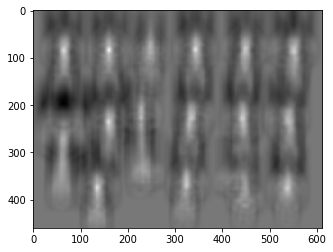

In [9]:
#calculate show result of cross correlating binary image with signed template
correlated = cross_correlation(signed_template, t_img)
plt.imshow(correlated, cmap="gray")

In [22]:
#find the 20 highest intensities in the resulting image and their indices
peak_val = 0
a = 0
peak_ind = (0,0)
peaks = []
for k in range(20):
    for i in range(len(correlated)):
        a = max(correlated[i])
        if a>peak_val:
            j = correlated[i].index(a)
            ps = [a, (i,j)]
            if ps not in peaks:
                peak_val = a
                peak_ind = (i, j)
    peaks.append([peak_val, peak_ind])
    peak_val = 0
print(peaks)

[[2766.0, (84, 160)], [2560.0, (83, 160)], [2560.0, (85, 160)], [2358.0, (82, 160)], [2358.0, (86, 160)], [2162.0, (81, 160)], [2160.0, (87, 160)], [1998.0, (374, 135)], [1993.0, (88, 160)], [1991.0, (80, 160)], [1988.0, (373, 135)], [1988.0, (375, 135)], [1958.0, (236, 159)], [1958.0, (376, 135)], [1948.0, (237, 159)], [1947.0, (235, 159)], [1908.0, (234, 159)], [1908.0, (377, 135)], [1900.0, (238, 159)], [1883.0, (372, 135)]]
